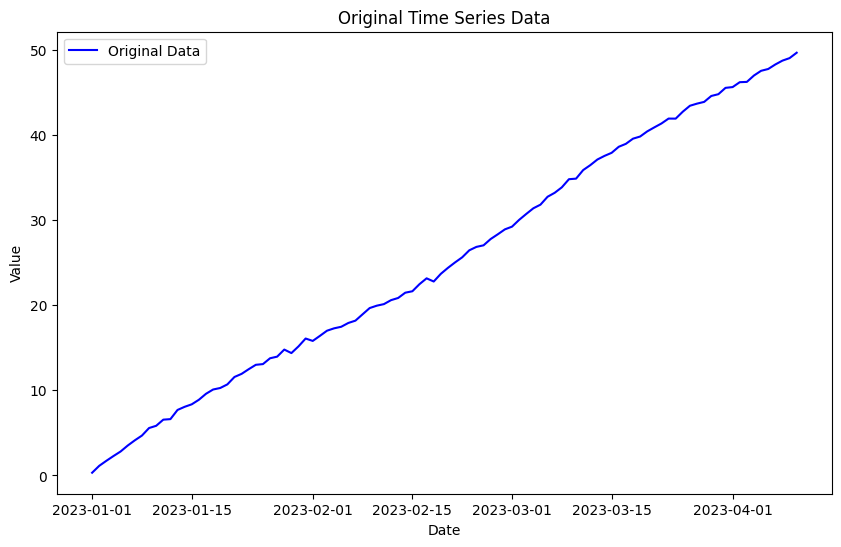

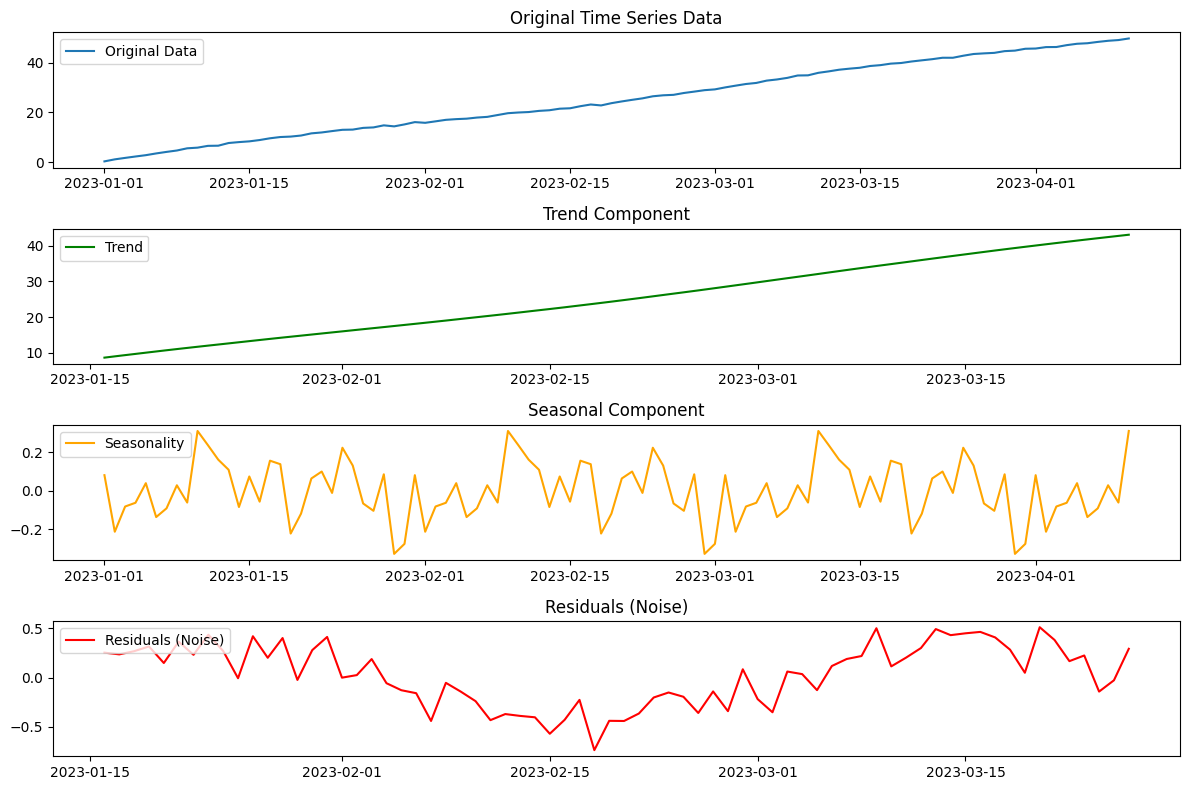

Trend Component:
Date
2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
Name: trend, dtype: float64

Seasonal Component:
Date
2023-01-01    0.080015
2023-01-02   -0.213384
2023-01-03   -0.082568
2023-01-04   -0.063181
2023-01-05    0.038548
Name: seasonal, dtype: float64

Residuals (Noise) Component:
Date
2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
Name: resid, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = 0.5 * np.linspace(1, 100, 100) + np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.2, 100)

data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', color='blue')
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

result = seasonal_decompose(data['Value'], model='additive', period=30)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Value'], label='Original Data')
plt.legend(loc='upper left')
plt.title("Original Time Series Data")

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title("Trend Component")

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.legend(loc='upper left')
plt.title("Residuals (Noise)")

plt.tight_layout()
plt.show()

print("Trend Component:")
print(result.trend.head())

print("\nSeasonal Component:")
print(result.seasonal.head())

print("\nResiduals (Noise) Component:")
print(result.resid.head())


<ipython-input-2-a95f5d053384>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2020-01-01', periods=36, freq='M')


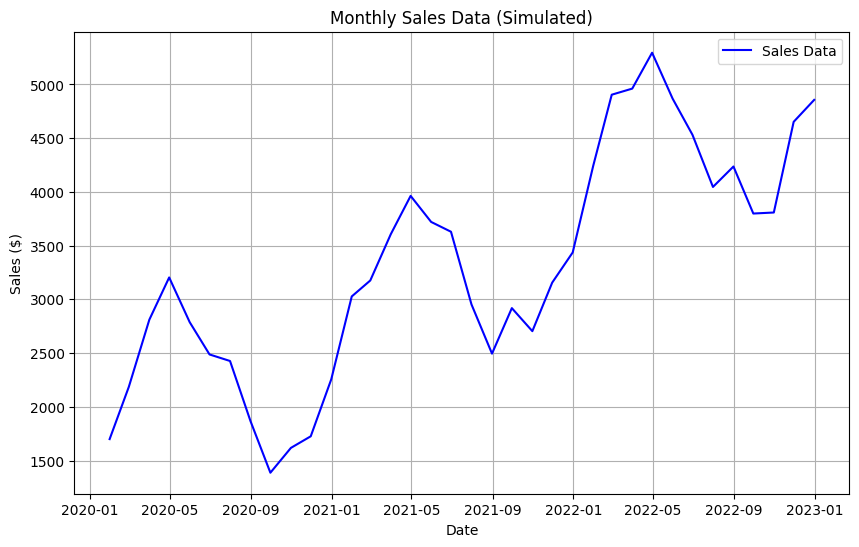

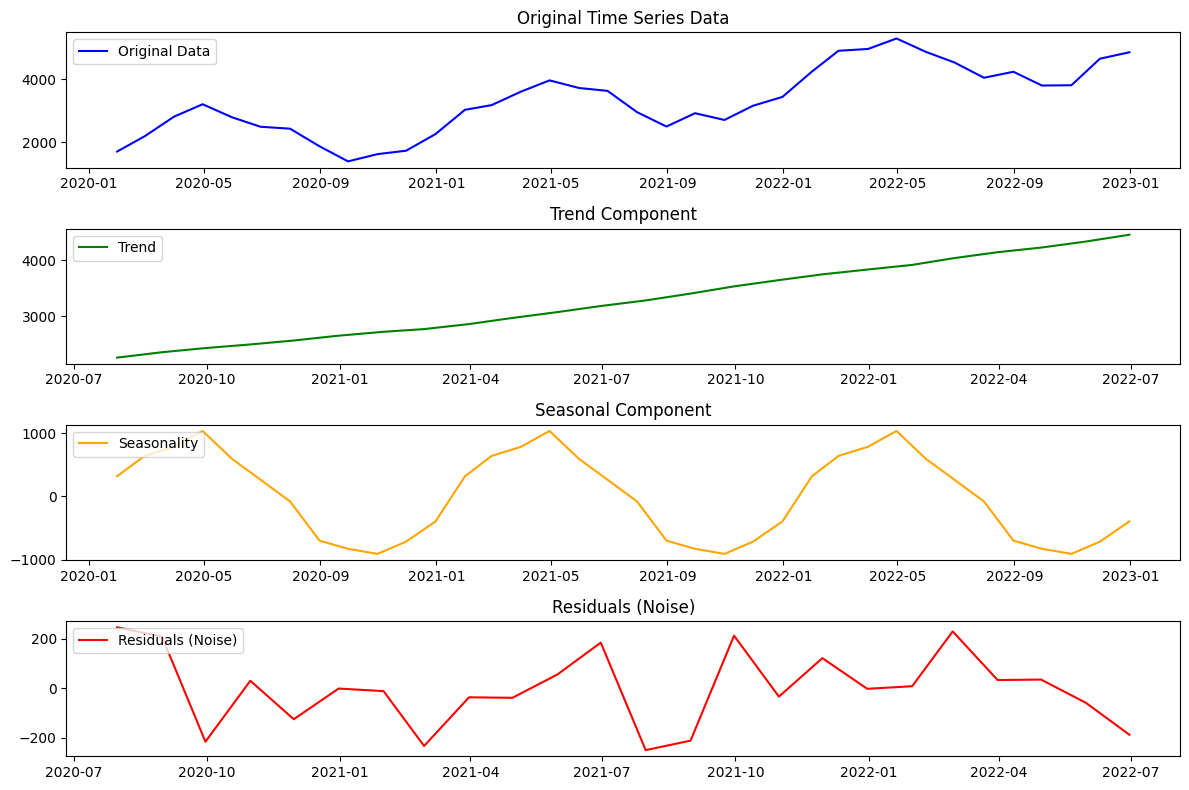

Trend Component:
Date
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN
Name: trend, dtype: float64

Seasonal Component:
Date
2020-01-31     317.039450
2020-02-29     638.845134
2020-03-31     782.984651
2020-04-30    1032.265916
2020-05-31     591.047919
Name: seasonal, dtype: float64

Residuals (Noise) Component:
Date
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN
Name: resid, dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(42)

dates = pd.date_range('2020-01-01', periods=36, freq='M')

trend = 1500 + 100 * np.linspace(1, 36, 36)

seasonality = 1000 * np.sin(2 * np.pi * np.linspace(0, 3, 36))

noise = np.random.normal(0, 200, 36)

sales = trend + seasonality + noise

data = pd.DataFrame({
    'Date': dates,
    'Sales': sales
})

data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Sales Data', color='blue')
plt.title("Monthly Sales Data (Simulated)")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Sales'], model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Sales'], label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.title("Original Time Series Data")

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title("Trend Component")

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.legend(loc='upper left')
plt.title("Residuals (Noise)")

plt.tight_layout()
plt.show()

print("Trend Component:")
print(result.trend.head())

print("\nSeasonal Component:")
print(result.seasonal.head())

print("\nResiduals (Noise) Component:")
print(result.resid.head())
